In [2]:
import pandas as pd
import numpy as np
import bz2
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = bz2.BZ2File('../data/train.ft.txt.bz2')
train_lines = train.readlines() 
train_lines = [x.decode('utf-8') for x in train_lines]

In [ ]:
train_labels = [i.split(" ")[0] for i in train_lines]
train_texts = [" ".join(i.split(" ")[1:]) for i in train_lines]

In [ ]:
df_train = pd.DataFrame(columns= ["Labels", "Features"])
df_train['Labels'] = train_labels
df_train['Features'] = train_texts

In [ ]:
df_train

,Labels,Features
0,__label__2,Stuning even for the non-gamer: This sound tra...
1,__label__2,The best soundtrack ever to anything.: I'm rea...
2,__label__2,Amazing!: This soundtrack is my favorite music...
3,__label__2,Excellent Soundtrack: I truly like this soundt...
4,__label__2,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
3599995,__label__1,Don't do it!!: The high chair looks great when...
3599996,__label__1,"Looks nice, low functionality: I have used thi..."
3599997,__label__1,"compact, but hard to clean: We have a small ho..."
3599998,__label__1,what is it saying?: not sure what this book is...


In [ ]:
df_train.value_counts("Labels")

Labels
__label__1    1800000
__label__2    1800000
dtype: int64

Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
X_train_tfidf = tfidf.fit_transform(df_train['Features'])
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, df_train['Labels'], random_state = 0)

In [ ]:
model = LinearSVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

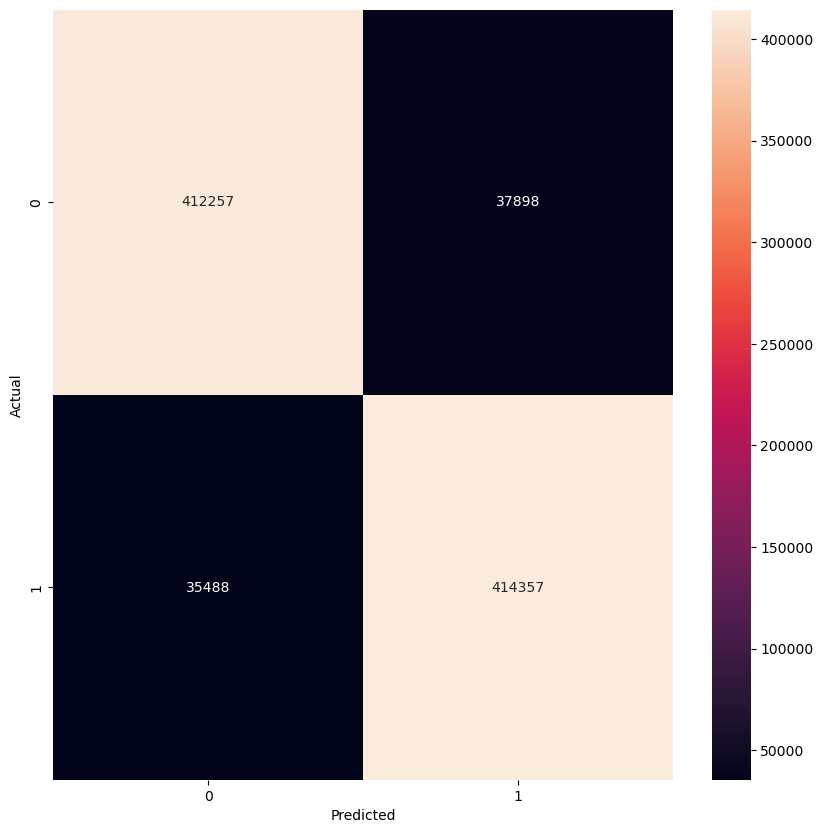

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
cmn = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))